**Course website**: http://www.leouieda.com/matematica-especial

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

# Integração Numérica

## Imports

Coloque **todos** os `import` na célula abaixo. Não se esqueça do `%matplotlib inline` para que os gráficos apareçam no notebook.

In [3]:
# Dessa vez vamos precisar da biblioteca matemática "math"
# Ela define funções como sin, cos, tan, exp e constantes como pi
import math

## Regra dos retângulos

O jeito mais simples de integração numérica é a regra dos retângulos. Nela, aproximamos a integral pela soma das áreas de retângulos. Cada retângulo se encontra abaixo de um dos pontos dos dados. A largura do retângulo é o espaçamento entre os dados $\Delta$. A altura do retângulo é o valor do dado naquela posição $d_i$.

Se tivermos nossos dados em um vetor de dados $\bar{d}$ (**nota**: vetores serão representados com uma barra em cima):

$$
\bar{d} = \left[ d_1 ~ d_2 ~ d_3 ~ \ldots ~ d_N \right],
$$

a integral poderá ser aproximada pela soma das áreas dos retângulos:

$$
A = \sum\limits_{i=1}^{N} \Delta d_i
$$

### Algoritmo

Utilize a célula vazia abaixo (tipo Markdown) para colocar uma descrição do algoritmo em português (não em código). Não se esqueça de relacionar os passos do algoritmo com as fórmulas matemáticas do método.

**Dicas**:

* Help sobre Markdown: https://help.github.com/articles/markdown-basics/
* Como utilizar fórmulas matemáticas: https://www.sharelatex.com/learn/Mathematical_expressions


A área dos retângulos é igual ao somatório de i=1 até N da multiplicação do intervalo entre os dados (Δ) e a altura do retângulo na posição i (di).

### Dados para teste

Vamos utilizar dados gerados a partir de uma função $d(t) = \cos(t)$ para testar o método de integração. A vantagem do cosseno é que sabemos quanto deve ser a integral:

$$
\int\limits_a^b \cos(t) dt = \sin(b) - \sin(a)
$$

O código abaixo gera duas listas: uma com os tempos variando entre os limites de integração; outra com os valores correspondentes do cosseno.

In [7]:
# inicio e fim são os intervalos de integração
inicio = 0
fim = math.pi/2 # Funções trigonométricas utilizam ângulos em radianos!
N = 50
# Precisamos saber o intervalo entre cada ponto dos dados
# A divisão é por N - 1 pois existem N - 1 intervalos entre N pontos
intervalo = (fim - inicio)/(N - 1)
print("Espaçamento entre os dados:", intervalo)
tempos = []
dados = []
for i in range(N):
    t = inicio + i*intervalo
    tempos.append(t)
    dados.append(math.cos(t))

print(tempos)
print(dados)

Espaçamento entre os dados: 0.0320570678937734
[0.0, 0.0320570678937734, 0.0641141357875468, 0.09617120368132019, 0.1282282715750936, 0.16028533946886697, 0.19234240736264038, 0.2243994752564138, 0.2564565431501872, 0.28851361104396056, 0.32057067893773394, 0.3526277468315074, 0.38468481472528077, 0.41674188261905415, 0.4487989505128276, 0.48085601840660097, 0.5129130863003744, 0.5449701541941477, 0.5770272220879211, 0.6090842899816945, 0.6411413578754679, 0.6731984257692414, 0.7052554936630148, 0.7373125615567881, 0.7693696294505615, 0.8014266973443349, 0.8334837652381083, 0.8655408331318817, 0.8975979010256552, 0.9296549689194286, 0.9617120368132019, 0.9937691047069753, 1.0258261726007487, 1.0578832404945222, 1.0899403083882955, 1.121997376282069, 1.1540544441758422, 1.1861115120696157, 1.218168579963389, 1.2502256478571625, 1.2822827157509358, 1.3143397836447093, 1.3463968515384828, 1.378453919432256, 1.4105109873260295, 1.4425680552198028, 1.4746251231135763, 1.5066821910073496, 1.

Utilize a célula abaixo para gerar um gráfico de `dados` por `tempos`.

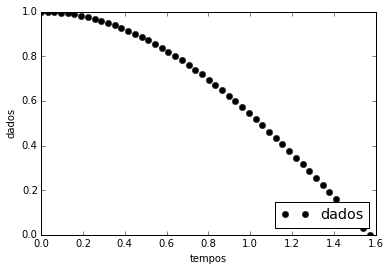

In [8]:
# importamos a biblioteca do matplot e a ativamos
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure() # criamos uma figura
plt.plot(tempos, dados, "ok", label = "dados") # definimos os eixos do grafico, o marcador e a legenda
plt.xlabel("tempos") # nomeamos o eixo x
plt.ylabel("dados") # nomeamos o eixo y
legend = plt.legend(loc = 'lower right', fontsize = 'x-large') # definimos a localização da legenda e o tamanho da fonte

### Implementação

Implemente a regra dos retângulos para integrar os dados gerados acima. Coloque seu cógido na célula abaixo.

In [9]:
# Fizemos a soma de todos os valores de dados
soma = 0 
for dado in dados:
    soma = soma + dado
# Calculamos a integral pelo metodo dos retangulos e imprimimos o resultado
integral = soma*intervalo
print(integral)

1.0159428945132496


Nas células abaixo calcule e imprima:

1. A solução analítica (verdadeira) para a integral
2. O erro cometido $E = \left|res_{true} - res_{calc}\right|$

Dica: a função `abs` calcula o valor absoluto de um número.

In [5]:
# Como a integral de a até b de cos(t)dt é igual a sin(b) - sin(a), calculamos a solução analítica para a integral e a imprimimos
int_verdadeira = math.sin(math.pi/2) - math.sin(0)
print(int_verdadeira)
# Calculamos o erro cometido e o imprimimos
erro = abs(int_verdadeira - integral)
print(erro)

1.0
-0.015942894513249595


**Responda na célula abaixo:** Por que o erro não é zero e quais são os fatores que influenciam o erro?

Porque a regra do retângulo é uma aproximação da integral verdadeira, e não igual a ela, e por isso o resultado não é zero. Quanto menor o intervalo entre os dados, ou seja, quanto maior o número de dados num mesmo período, menor será o erro pois maior será o número de retângulos e de áreas calculadas, e assim menor serão as áreas dos retângulos sobrando e faltando em relação à área abaixo da curva.

### Resultado esperado

No caso acima estamos integrando o cosseno de 0 a $\pi/2$, então o valor esperado da integral é 1. Seu resultado não será exatamente 1 mas deve estar entre 0.9 e 1.1.

## Regra dos trapézios

A regra dos trapézios é parecida com a regra dos retângulos. Mas utilizaremos a área de um trapézio ao invés da área de um retângulo. O trapézio será definido com base em dois pontos adjacentes nos dados ($d_i$ e $d_{i+1}$, por exemplo).

$$
A = \sum\limits_{i=1}^{N - 1} \Delta \frac{d_i + d_{i+1}}{2}
$$

### Algoritmo

Descreva abaixo o algoritmo utilizado (em português) para fazer a integração numérica utilizando a regra dos trapézios.

A área dos trapézios é igual ao somatório de i=1 até N-1 da multiplicação do intervalo entre os dados (Δ) pela soma da altura de dois pontos adjacentes (di + di+1) dividido por 2.

### Implementação

Vamos utilizar os mesmo dados utilizados na regra dos retângulos (na dúvida, rode novamente a célula que gera os dados). Abaixo, escreva e rode o código que faz a integração numérica com a regra dos trapézios. 

In [10]:
# Calculamos a soma de todos os di com di+1 
soma = 0
for i in range(0, N - 1):
    soma = soma + dados[i] + dados[i+1]    
# Calculamos a integral pelo metodo dos trapezios e imprimimos o resultado
int_trapezios = (soma*intervalo)/2
print(int_trapezios)

0.9999143605663638


Calcule e imprima também a solução analíca e o erro cometido.

In [11]:
# Como a integral de a até b de cos(t)dt é igual a sin(b) - sin(a), calculamos a solução analítica para a integral e a imprimimos
int_verdadeira = math.sin(math.pi/2) - math.sin(0)
print(int_verdadeira)
# Calculamos o erro cometido e o imprimimos
erro2 = abs(int_verdadeira - int_trapezios)
print(erro2)

1.0
8.563943363615323e-05


**Responda na célula abaixo:** O erro é maior ou menos que para a regra dos retângulos? Por que? Você esperava isso?

O erro é 3 ordens de grandeza menor, pois a regra dos trapézios dá uma aproximação melhor já que não há áreas sobrando acima da curva e as áreas faltando abaixo da curva são muito menores, se aproximando mais do traçado original da curva. Sim, pelos motivos descritos anteriormente.

### Resultado esperado

Novamente, o valos esperado é 1 mas seu resultado não será exatamente 1 (mas deve estar entre 0.9 e 1.1).

## Comparação dos dois métodos

Vamos comparar o erro de ambos métodos. Uma comparação muito utilizada em métodos numéricos em geral é como o erro varia com o número de dados (ou pontos) utilizados.

Nas células abaixo, calcule o erro da integração numérica para diferentes valores de `N`. Os valores de N deverão variar de 10 a 1000 de 10 em 10. Mantenha os intervalos de integração entre $0$ e $\pi/2$. Faça esse cálculo para os dois métodos: retângulos e trapézios.

Ao final, faça um gráfico do erro pelos valores de `N`. O gráfico deverá ter duas curvas, uma para cada método. O eixo y (erros) deverá estar em escala logarítmica.

**Dicas**: 

* Gere uma lista dos valores de `N`.
* Para colocar o eixo y em escala log: `plt.yscale('log')`

In [15]:
# Calculamos a integral verdadeira, criamos duas listas vazias para guardar os erros calculados para cada regra e definimos o intervalo de variação da função
int_verdadeira = math.sin(math.pi/2) - math.sin(0)
erros_ret = []
erros_trap = []
inicio = 0
fim = math.pi/2
# Para cada valor de N, geramos as listas com os dados, integramos pela regra dos retângulos, calculamos os erro, guardamos esses erros na lista erros_ret e imprimimos essa lista
lista_N = range(10, 1010, 10)
for N in lista_N:
    intervalo = (fim - inicio)/(N - 1)
    tempos = []
    dados = []
    for i in range(0, N):
        t = inicio + i*intervalo
        tempos.append(t)
        dados.append(math.cos(t))
    soma = 0 
    for dado in dados:
        soma = soma + dado
    integral_ret = soma*intervalo
    erro = abs(int_verdadeira - integral_ret)
    erros_ret.append(erro)
print("Erro dos Retângulos", erros_ret)
# Para cada valor de N, geramos as listas com os dados, integramos pela regra dos trapézios, calculamos os erro, guardamos esses erros na lista erros_trap e imprimimos essa lista    
lista_N = range(10, 1010, 10)
for N in lista_N:
    intervalo = (fim - inicio)/(N - 1)
    tempos = []
    dados = []
    for i in range(0, N):
        t = inicio + i*intervalo
        tempos.append(t)
        dados.append(math.cos(t))    
    soma2 = 0
    for i in range(0, N - 1):
        soma2 = soma2 + dados[i] + dados[i+1]
    integral_trap = (soma2*intervalo)/2
    erro2 = abs(int_verdadeira - integral_trap)
    erros_trap.append(erro2)
    
print("Erro dos Trapézios", erros_trap)

        

Erro dos Retângulos [0.08472669439144243, 0.04076710504024694, 0.026838192538866545, 0.02000322554546985, 0.015942894513249595, 0.013252764278358642, 0.01133939398026107, 0.009908802562918373, 0.008798739896037189, 0.007912335532624493, 0.007188181326510001, 0.006585464592107515, 0.006076001791466945, 0.005639704338090912, 0.005261866997297915, 0.004931477824744457, 0.00464012718601392, 0.004381281927089864, 0.004149789644384727, 0.003941532222524913, 0.0037531787092357494, 0.0035820058140871858, 0.003425765383925139, 0.0032825851113538196, 0.0031508931435171306, 0.00302936013827515, 0.002916854231957311, 0.002812405682364627, 0.0027151788455872516, 0.002624449771287951, 0.0025395881446874657, 0.0024600426222463057, 0.002385328839545453, 0.0023150195400298834, 0.002248736399519391, 0.002186143216111658, 0.0021269402066179666, 0.002070859205313358, 0.002017659602748134, 0.0019671248948440745, 0.001919059737929718, 0.0018732874252089804, 0.001829647715961169, 0.0017879949612613633, 0.001

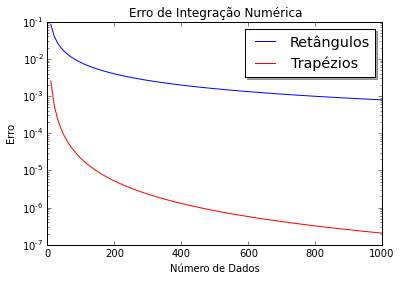

In [22]:
plt.figure()
plt.plot(lista_N, erros_ret , "-b" , label = "Retângulos")
plt.plot(lista_N , erros_trap , "-r" , label = "Trapézios")
plt.title("Erro de Integração Numérica")
plt.xlabel("Número de Dados")
plt.yscale('log')
plt.ylabel("Erro")
legend = plt.legend(loc = "upper right" , shadow = True , fontsize = "x-large")

**Responda na célula abaixo**: Como o erro varia com `N` para os dois métodos? Aumentar o número de dados de 50 para 200 nos dá a mesma diminuição no erro que aumentar de 650 para 800? Sempre vale a pena utilizar mais dados (lembre-se que a escala é logarítmica)? 

O erro diminui logaritimicamente a medida que se aumenta o N. Não, porque essa diminuição é logarítmica. Não, porque como a escala é logarítmica a partir de um certo valor de N a diminuição do erro com o aumento de N é quase desprezível, mas para valores menores de N essa diminuição do erro é considerável.

### Resultado esperado

O gráfico ao final deverá ser parecido com:

![images/erro-por-ndados.png](images/erro-por-ndados.png)

## Tarefa bônus: Probabilidades

Vamos assumir que uma variável aleatória $x$ segue uma [distribuição normal](https://en.wikipedia.org/wiki/Normal_distribution) com média zero e desvio padrão $\sigma$. Isso quer dizer que a [densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function) para $x$ é

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp \left( -\frac{x^2}{2 \sigma^2} \right)
$$

A probabilidade de $x$ cair no intervalo $[a, b]$ é dada por ([refência](https://en.wikipedia.org/wiki/Probability_distribution#Continuous_probability_distribution)):

$$
P(a \leq x \leq b) = \int\limits_a^b f(x) dx
$$

Calcule na célula abaixo qual é a probabilidade de $x$ estar entre $[-\sigma, +\sigma]$ para $\sigma = 5$.